<a href="https://colab.research.google.com/github/IshaSarangi/Edureka_Notes/blob/main/Edureka_Tensorflow_FirstANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1lES7iGedSdYsXk6ywYbGWLUeRalHaWrU?usp=sharing

Tensorflow Activation Functions

In [29]:
import tensorflow as tf

In [30]:
from re import X
#Create Basic Tensor
x = tf.constant([-2, -1, 0, 1, 2, 3, 4, 5], dtype=tf.float32)
print(type(x))
print(x)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([-2. -1.  0.  1.  2.  3.  4.  5.], shape=(8,), dtype=float32)


In [31]:
#Applying Activation Function
#1. Sigmoid Function
tf.nn.sigmoid(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([0.11920292, 0.26894143, 0.5       , 0.73105854, 0.880797  ,
       0.95257413, 0.98201376, 0.9933072 ], dtype=float32)>

In [32]:
#2. TanH Function (-1 to 1)
tf.nn.tanh(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([-0.9640276 , -0.7615942 ,  0.        ,  0.7615942 ,  0.9640276 ,
        0.9950547 ,  0.9993292 ,  0.99990916], dtype=float32)>

In [33]:
#3. ReLU Function (0 TO infinity            )
tf.nn.relu(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0., 0., 0., 1., 2., 3., 4., 5.], dtype=float32)>

Create Layers in NN

In [34]:
tf.keras.layers.Dense(100, activation='relu')

<Dense name=dense_9, built=False>

MNIST Hand Written Digit Recognition

Objectives:
1. Build and train basic ANN using Tensorflow and Keras
2. Achieve maximum accuracy
3. Understand the impact of neurons, layers, epochs, batch size and learning rate
4. Evaluate ANN and study the losses

In [35]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [36]:
#Read data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, '7')

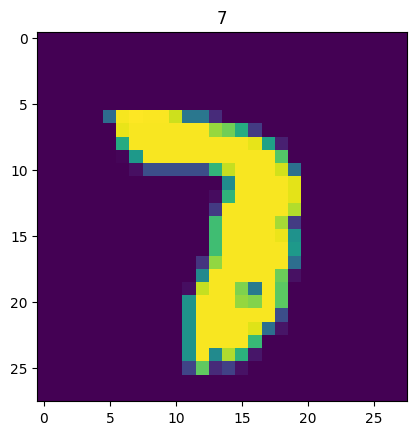

In [37]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1400])
plt.title(y_train[1400])

In [38]:
print(x_train[1400])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  90 252 255 254 254 236 101 101  31   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 247 253 253 253 253 253 253 216 200 158  44   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 157 253 253 253 253 253 253 253 253 25

In [39]:
#Normalize Pixel range to [0, 1]
x_train = x_train/255
x_test = x_test/255
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [40]:
#Flatten Image data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [41]:
#Building the ANN
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,))) #input layer
model.add(layers.Dense(64, activation='relu')) #hidden layer
model.add(layers.Dense(10, activation='softmax')) #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
#Compiling ANN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Adam is optimizer
#SCC for multiclass problems
#Accuracy: measure of performance

In [47]:
#Train the ANN
epochs = 15
batch_size = 100
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9950 - loss: 0.0143 - val_accuracy: 0.9731 - val_loss: 0.1242
Epoch 2/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9971 - loss: 0.0099 - val_accuracy: 0.9772 - val_loss: 0.1056
Epoch 3/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9762 - val_loss: 0.1231
Epoch 4/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9751 - val_loss: 0.1336
Epoch 5/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9760 - val_loss: 0.1116
Epoch 6/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9975 - loss: 0.0085 - val_accuracy: 0.9783 - val_loss: 0.1117
Epoch 7/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9792 - val_loss: 0.1066
Epoch 8/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.

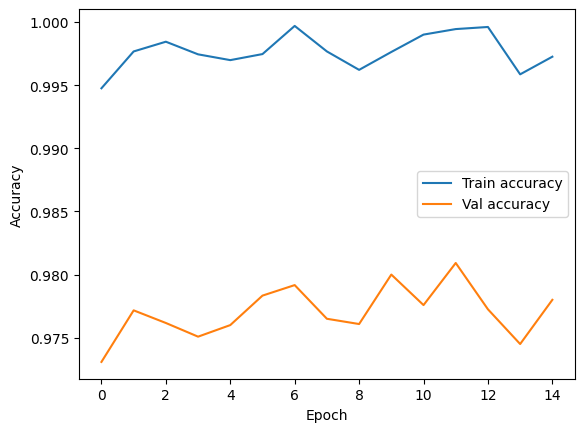

In [50]:
#Plot Accuracy
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

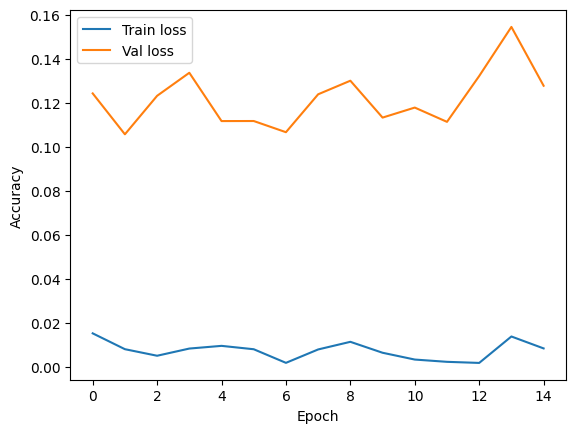

In [51]:
#Plot Losses
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [53]:
#Predict and evaluate
y_pred = model.predict(x_test)
print(y_pred.shape)
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
[1.5827534e-18 3.2076524e-14 3.1088681e-14 7.0314998e-10 7.7181858e-22
 3.2227595e-16 1.0530652e-21 1.0000000e+00 7.0772021e-15 5.2606249e-11]


In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[ 974    1    1    1    0    0    0    1    2    0]
 [   0 1127    3    0    0    0    2    1    2    0]
 [   3    1 1010    3    1    0    5    4    4    1]
 [   1    1    3  987    0    4    0    4    5    5]
 [   0    0    2    1  965    0    7    2    1    4]
 [   2    0    0   13    1  859    4    2    5    6]
 [   2    2    1    1    2    3  947    0    0    0]
 [   2    4    8    2    1    0    0 1001    3    7]
 [   2    0    1    4    2    2    2    4  952    5]
 [   4    4    0    3    6    3    0    6    0  983]]


<Axes: >

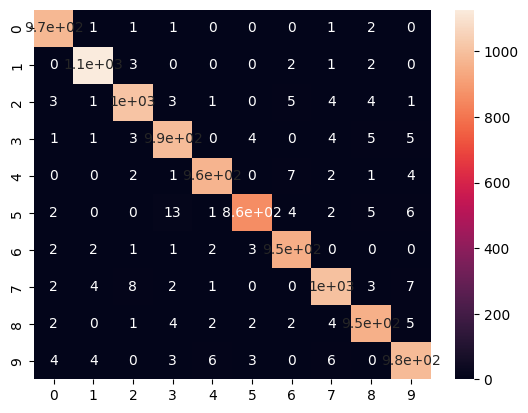

In [58]:
sns.heatmap(cm, annot=True)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [60]:
print(y_pred_classes[0])
print(y_test[0])

7
7
